In [115]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import matplotlib.pyplot as plt

In [2]:
ROOT_DIR = '/g/data/w40/ab2313/best'

In [3]:
best_paths = os.listdir(ROOT_DIR)

In [4]:
best_paths 

['Complete_TAVG_LatLong1.nc',
 'Land_and_Ocean_Alternate_LatLong1.nc',
 'Land_and_Ocean_LatLong1.nc',
 'Complete_TAVG_Daily_EqualArea.nc']

In [133]:
fname = 'Land_and_Ocean_Alternate_LatLong1'

In [128]:
os.stat(f'{ROOT_DIR}/{fname}').st_size/10 **6

437.151829

In [129]:
xr_kwargs  = dict(use_cftime = True, 
                  chunks = dict(latitude = 100, longitude = 100, time  = 10))

In [10]:
xr_kwargs 

{'use_cftime': True, 'chunks': {'latitude': 100, 'longitude': 100, 'time': 10}}

# Normal

Information on the dataset can be found here.

http://berkeleyearth.lbl.gov/auto/Global/Gridded/Gridded_README.txt


File Contents
<br>
The following variables are presently included in the gridded data set:
<br>
*    latitude
*    longitude
*    time
*    temperature
*    land_mask
*    climatology
 <br> <br>
latitude: A list of latitude values indicating grid box centers.  For
  the "EqualArea" product it lists every grid box, and for the "LatLong1"
  product it lists the centers for a single column.  Values are in degrees,
  with positive values used for the Northern Hemisphere.
 <br> <br>
longitude: A list of longitude values indicating grid box centers.  For
  the "EqualArea" product it lists every grid box, and for the "LatLong1"
  product it lists the centers for a single row.  Values are in degrees,
  with positive values used for the Eastern Hemisphere.
 <br>  <br>
time: A list of times at which data is reported.  Data format is decimal
  with year and fraction of year reported, with each value corresponding
  to the midpoint of the respective month.  For example, 1981.125
  indicates February 1981.  
<br> <br>
temperature: A surface air temperature anomaly field.  For "LatLong1"
  case, the dimension are latitude x longitude x time.  For the
  "EqualArea" case, the dimensions are number of grid cells x time.  Each
  element measure the local temperature anomaly, in degrees C, for the 
  corresponding location and time.  Missing values are reported as NaN.  
  A value is reported as missing if the grid cell is less than 5land or
  if the coverage diagnostic indicates that the locally available data 
  provides less than a 20constraint on the anomaly.
 <br> <br>
land_mask: For each grid cell, the fraction of the cell which corresponds
  to land (as opposed to ocean or other large water bodies).  
 <br> <br>
climatology: For each grid cell, an estimate of the true surface
  temperature for each month during the period January 1951 to December
  1980 reported in degrees C.  For "LatLong1", the dimensions are 
  latitude x longitude x month, where month has length 12 and corresponds 
  to January through December respectively.  Hence the first month is an 
  estimated average for all Januarys from 1951 to 1980, teh second month 
  is for all Februarys, etc.  For the "EqualArea" case, the dimensions 
  are grid cell number x month.
<br> <br>
%
The gridded data files do not currently contain uncertainty information.

In [134]:
 best_comp = xr.open_dataset(f'{ROOT_DIR}/{fname}.nc', **xr_kwargs)

In [135]:
best_comp

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, month_number: 12, time: 2056)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.021e+03 2.021e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    temperature  (time, latitude, longitude) float32 dask.array<chunksize=(10, 100, 100), meta=np.ndarray>
    climatology  (month_number, latitude, longitude) float32 dask.array<chunksize=(12, 100, 100), meta=np.ndarray>
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               27-May-2021 05:59:23
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   05-May-2021 08:21:24
    ocean_source_history:  27-May-2021 04:16:16
    comment:               This file contains Berkeley Earth surface temperat...

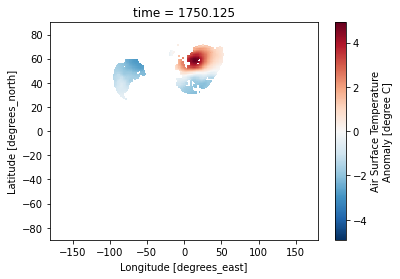

In [101]:
best_comp.temperature.isel(time = 1).plot()

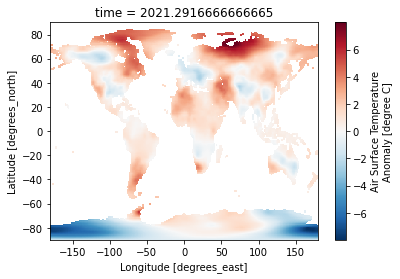

In [102]:
best_comp.temperature.isel(time = -1).plot()

The time in the dataset is the worst format I have ever seen. The time is the year.fraction of th year (e.g. .125 is feb).

In [104]:
best_comp_time = best_comp.time.values
best_comp_time 

array([1750.04166667, 1750.125     , 1750.20833333, ..., 2021.125     ,
       2021.20833333, 2021.29166667])

Isolating just the fraction.

In [105]:
best_comp_time_frac = best_comp_time - best_comp_time.astype(int)
best_comp_time_frac

array([0.04166667, 0.125     , 0.20833333, ..., 0.125     , 0.20833333,
       0.29166667])

Converting to the month of the year.

In [106]:
year_frac = best_comp_time_frac
MONTHS_IN_YEAR = 12
# Multiplying the fraction by 12 to get the month (ceil then used to make sure it goes up.)
months = np.ceil(year_frac * MONTHS_IN_YEAR)
months[:12]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [107]:
# The years is just the start part - the fraction
years = best_comp_time - best_comp_time_frac
years[:15]

array([1750., 1750., 1750., 1750., 1750., 1750., 1750., 1750., 1750.,
       1750., 1750., 1750., 1751., 1751., 1751.])

In [108]:
np.tile([1], reps = 10)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [109]:
# Putting into a dataframe with the day as just 1 for each datetime value (the day is needed)
time_df = pd.DataFrame({'year':years, 'month':months, 'day':np.tile([1], reps = len(years))})
time = pd.to_datetime(time_df).values
time

array(['1750-01-01T00:00:00.000000000', '1750-02-01T00:00:00.000000000',
       '1750-03-01T00:00:00.000000000', ...,
       '2021-02-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [112]:
# OVerriding their crap time with my better time.
best_comp['time'] = time

In [111]:
best_comp

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, month_number: 12, time: 3256)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) datetime64[ns] 1750-01-01 1750-02-01 ... 2021-04-01
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    temperature  (time, latitude, longitude) float32 dask.array<chunksize=(10, 100, 100), meta=np.ndarray>
    climatology  (month_number, latitude, longitude) float32 dask.array<chunksize=(12, 100, 100), meta=np.ndarray>
Attributes:
    Conventions:          Berkeley Earth Internal Convention (based on CF-1.5)
    title:                Gridded Berkeley Earth Surface Temperature Anomaly ...
    history:              08-May-2021 12:32:27
    institution:          Berkeley Earth Surface Temperature Project
    source_file:          Complete_TAVG.50575s.20210508T121718.mat
    source_history:       05-May-2021 08:21:24
    source_code_version:  2015137b9f881189b6a97c8a51d5f953
    comment:              This file contains surface temperature anomaly fiel...

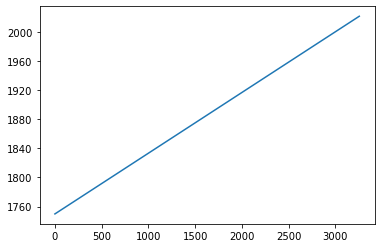

In [116]:
plt.plot(best_comp.time.values)

In [118]:
best_comp.where(best_comp.time.dt.year == 1851, drop = True).isel(time = 1)

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    time         datetime64[ns] 1851-02-01
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    temperature  (latitude, longitude) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
    climatology  (month_number, latitude, longitude) float32 dask.array<chunksize=(12, 100, 100), meta=np.ndarray>
Attributes:
    Conventions:          Berkeley Earth Internal Convention (based on CF-1.5)
    title:                Gridded Berkeley Earth Surface Temperature Anomaly ...
    history:              08-May-2021 12:32:27
    institution:          Berkeley Earth Surface Temperature Project
    source_file:          Complete_TAVG.50575s.20210508T121718.mat
    source_history:       05-May-2021 08:21:24
    source_code_version:  2015137b9f881189b6a97c8a51d5f953
    comment:              This file contains surface temperature anomaly fiel...

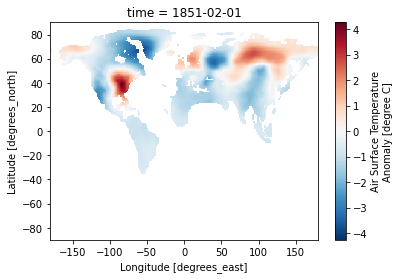

In [120]:
best_comp.where(best_comp.time.dt.year == 1851, drop = True).isel(time = 1).temperature.plot()

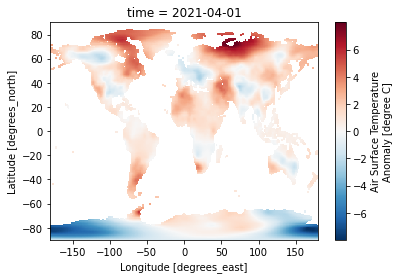

In [121]:
best_comp.isel(time = -1).temperature.plot()

In [122]:
best_comp

<xarray.Dataset>
Dimensions:      (latitude: 180, longitude: 360, month_number: 12, time: 3256)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) datetime64[ns] 1750-01-01 1750-02-01 ... 2021-04-01
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 dask.array<chunksize=(100, 100), meta=np.ndarray>
    temperature  (time, latitude, longitude) float32 dask.array<chunksize=(10, 100, 100), meta=np.ndarray>
    climatology  (month_number, latitude, longitude) float32 dask.array<chunksize=(12, 100, 100), meta=np.ndarray>
Attributes:
    Conventions:          Berkeley Earth Internal Convention (based on CF-1.5)
    title:                Gridded Berkeley Earth Surface Temperature Anomaly ...
    history:              08-May-2021 12:32:27
    institution:          Berkeley Earth Surface Temperature Project
    source_file:          Complete_TAVG.50575s.20210508T121718.mat
    source_history:       05-May-2021 08:21:24
    source_code_version:  2015137b9f881189b6a97c8a51d5f953
    comment:              This file contains surface temperature anomaly fiel...

In [136]:
ROOT_DIR

'/g/data/w40/ab2313/best'

In [138]:
fname

'Land_and_Ocean_Alternate_LatLong1'

In [139]:
best_comp.to_netcdf(f'{ROOT_DIR}/{fname}_time_processed.nc')

In [140]:
os.listdir(ROOT_DIR)

['Complete_TAVG_LatLong1.nc',
 'Land_and_Ocean_Alternate_LatLong1_time_processed.nc',
 'Land_and_Ocean_Alternate_LatLong1.nc',
 'Land_and_Ocean_LatLong1.nc',
 'Land_and_Ocean_Alternate_LatLong1.nc_time_processed',
 'Complete_TAVG_Daily_EqualArea.nc']